In [1]:
import xarray as xr
import xclimate as xclim

In [ ]:
GRID = xclim.load_fhist_ppe_grid()

FHIST = {}
FHIST["PRECT_day_1"] = xclim.load_coupled_fhist_ppe("PRECT", "atm", "day_1", "h2", keep_var_only=True)["PRECT"]

In [6]:
DAILY_PRECT_THRESH_100mm = 1.00 / (1000 * 24 * 60 * 60)  # [m/s] = 1.00 [mm/day]
DAILY_PRECT_THRESH_025mm = 0.25 / (1000 * 24 * 60 * 60)  # [m/s] = 0.25 [mm/day]
DAILY_PRECT_THRESH_050mm = 0.50 / (1000 * 24 * 60 * 60)  # [m/s] = 0.50 [mm/day]

Text(0.5, 1.05, 'Wet-day frequency as defined in Feldman et al. $Nature$ (2024)')

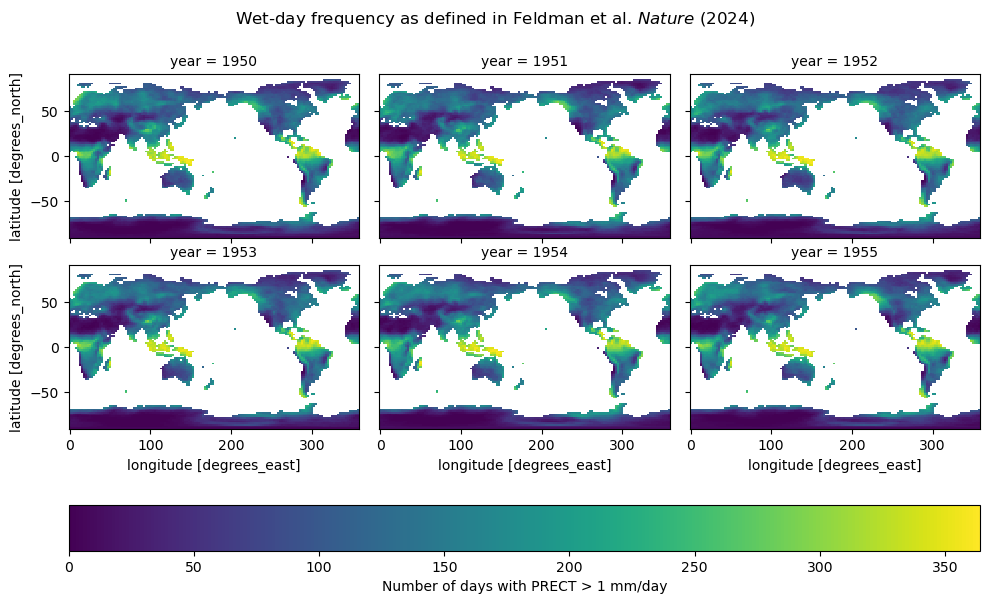

In [ ]:
fg = (FHIST["PRECT_day_1"].isel(member=0).sel(time=slice("1950-01", "1955-12")).where(GRID.LANDAREA>0) > DAILY_PRECT_THRESH_100mm).groupby("time.year").sum().where(GRID.LANDAREA>0).plot.pcolormesh(
    col="year", col_wrap=3, cbar_kwargs={"label": "Number of days with PRECT > 1 mm/day", "orientation": "horizontal"}, vmin=0) #, vmax=365, cmap="BrBG")
fg.fig.suptitle("Wet-day frequency as defined in Feldman et al. $Nature$ (2024)", y=1.05)

Text(0.5, 1.05, 'Wet-day frequency as defined in Feldman et al. $Nature$ (2024)')

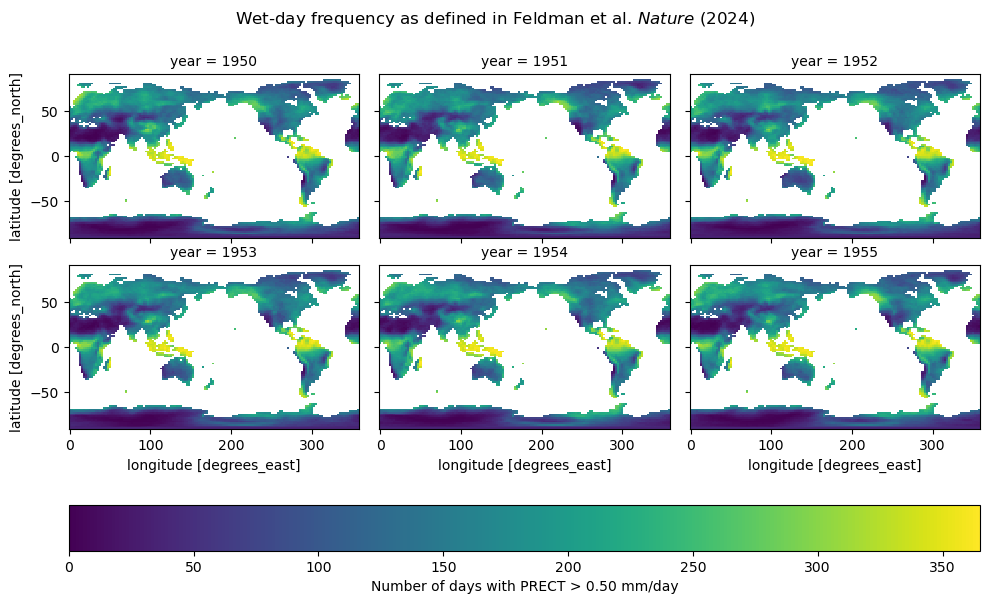

In [8]:
fg = (FHIST["PRECT_day_1"].isel(member=0).sel(time=slice("1950-01", "1955-12")).where(LA_FHIST>0) > DAILY_PRECT_THRESH_050mm).groupby("time.year").sum().where(LA_FHIST>0).plot.pcolormesh(
    col="year", col_wrap=3, cbar_kwargs={"label": "Number of days with PRECT > 0.50 mm/day", "orientation": "horizontal"}, vmin=0) #, vmax=365, cmap="BrBG")
fg.fig.suptitle("Wet-day frequency as defined in Feldman et al. $Nature$ (2024)", y=1.05)

Text(0.5, 1.05, 'Wet-day frequency as defined in Feldman et al. $Nature$ (2024)')

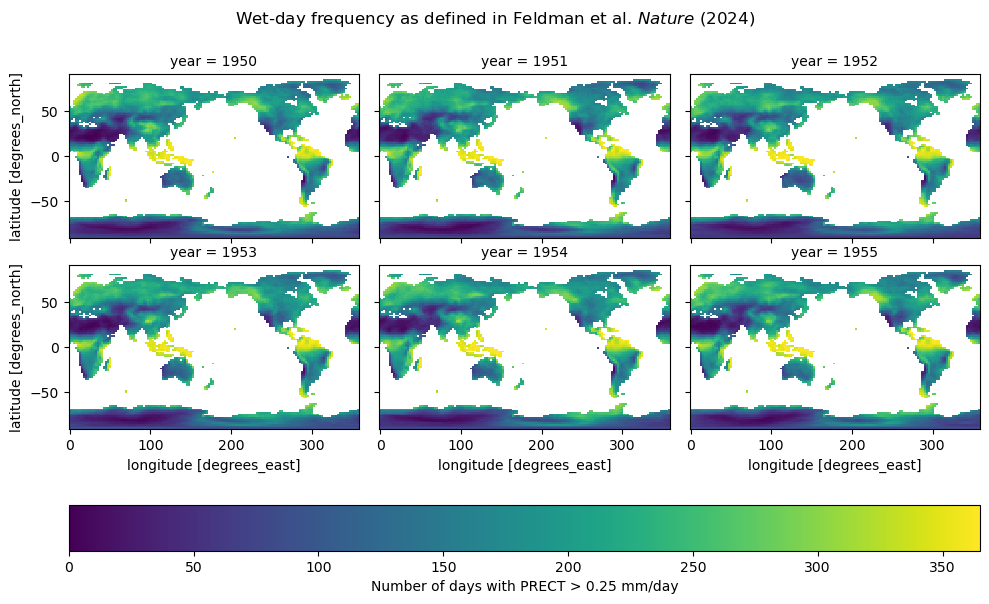

In [9]:
fg = (FHIST["PRECT_day_1"].isel(member=0).sel(time=slice("1950-01", "1955-12")).where(LA_FHIST>0) > DAILY_PRECT_THRESH_025mm).groupby("time.year").sum().where(LA_FHIST>0).plot.pcolormesh(
    col="year", col_wrap=3, cbar_kwargs={"label": "Number of days with PRECT > 0.25 mm/day", "orientation": "horizontal"}, vmin=0) #, vmax=365, cmap="BrBG")
fg.fig.suptitle("Wet-day frequency as defined in Feldman et al. $Nature$ (2024)", y=1.05)